In [65]:
#Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [89]:
import folium

In [76]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [77]:
import geopandas as gpd
print(gpd.__version__)

1.0.1


In [78]:
import geodatasets

In [52]:
pip install sqlalchemy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
# import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import text
        

In [37]:
# import kickstarter_projects.csv 
df = pd.read_csv('../data/kickstarter_projects.csv')


In [56]:
# Step 1: Read the CSV file
csv_file_path = '../data/kickstarter_projects.csv'  # Update the path if needed
df = pd.read_csv(csv_file_path)

# Step 2: Create a SQLite database connection
db_file_path = '../data/kickstarter.db'  # Path to the SQLite database file
engine = create_engine(f'sqlite:///{db_file_path}')

# Step 3: Write the DataFrame to the database
table_name = 'kickstarter_projects'  # Name of the table in the database
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"Data from {csv_file_path} has been successfully written to {db_file_path} in the table '{table_name}'.")

Data from ../data/kickstarter_projects.csv has been successfully written to ../data/kickstarter.db in the table 'kickstarter_projects'.


In [38]:
df.head()


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [39]:
df.shape

(374853, 11)

In [40]:
# find state values
df['State'].value_counts()


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [62]:
# find Country values for status 'Failed' or 'Successful'
df[df['State'].isin(['Failed', 'Successful'])]['Country'].value_counts()

Country
United States     261358
United Kingdom     29453
Canada             12370
Australia           6616
Germany             3436
France              2520
Netherlands         2411
Italy               2369
Spain               1873
Sweden              1509
Mexico              1411
New Zealand         1274
Denmark              926
Ireland              683
Switzerland          652
Norway               582
Belgium              523
Austria              485
Hong Kong            477
Singapore            454
Luxembourg            57
Japan                 23
Name: count, dtype: int64

In [127]:
# find Category values for status 'Failed' or 'Successful'
df[df['State'].isin(['Failed', 'Successful'])]['Category'].value_counts()


Category
Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: count, dtype: int64

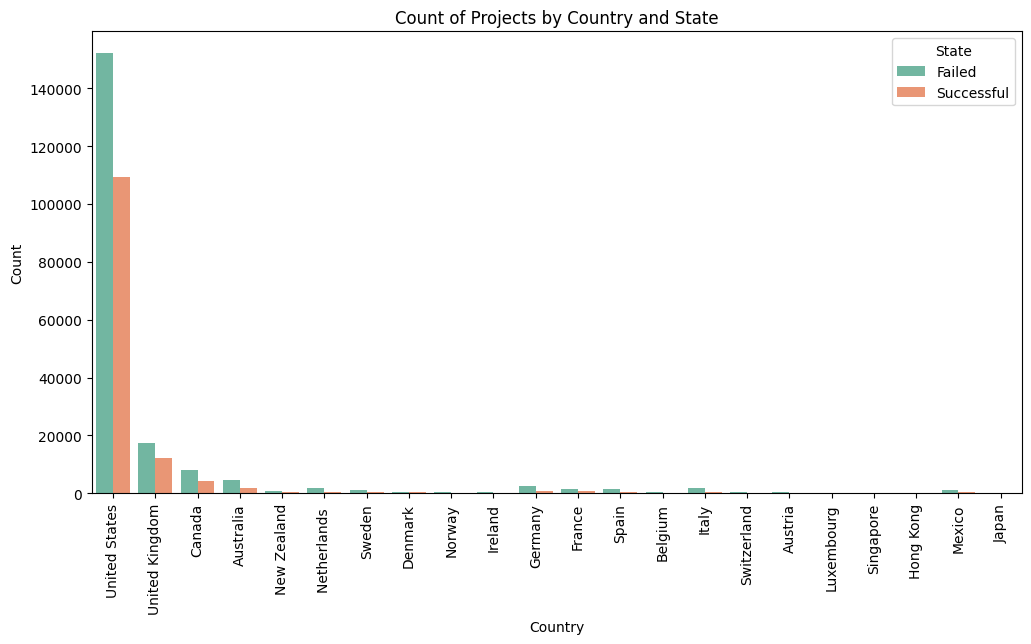

In [116]:
# plot Country values for status 'Failed' and status 'Successful'
plt.figure(figsize=(12, 6))         
sns.countplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Country', hue='State', palette='Set2')
plt.title('Count of Projects by Country and State')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.show()



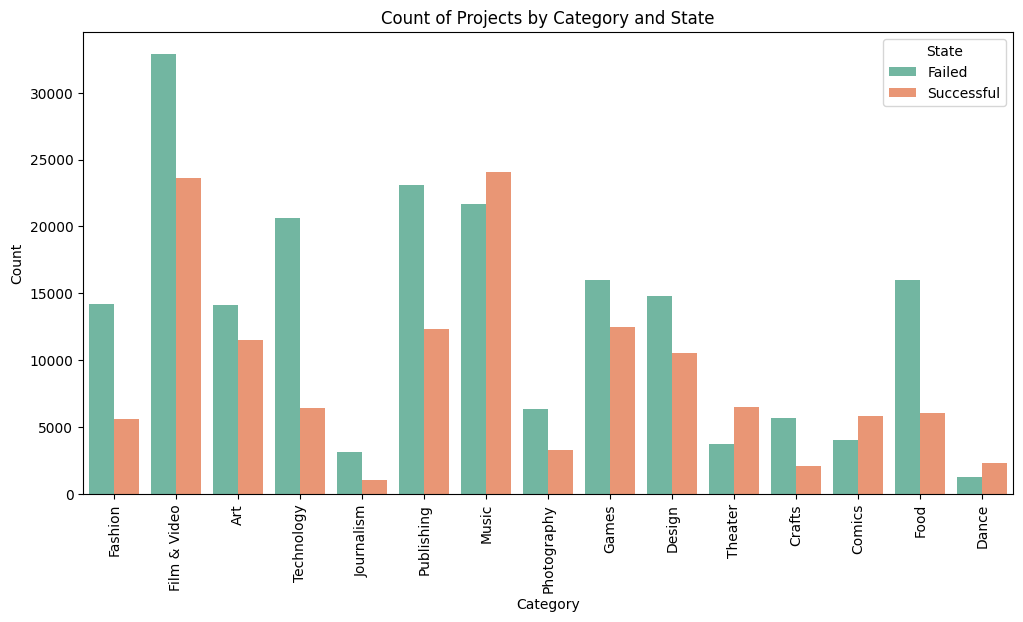

In [114]:
# plot Category values for status 'Failed' and status 'Successful'
plt.figure(figsize=(12, 6))             
sns.countplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Category', hue='State', palette='Set2')
plt.title('Count of Projects by Category and State')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.show()


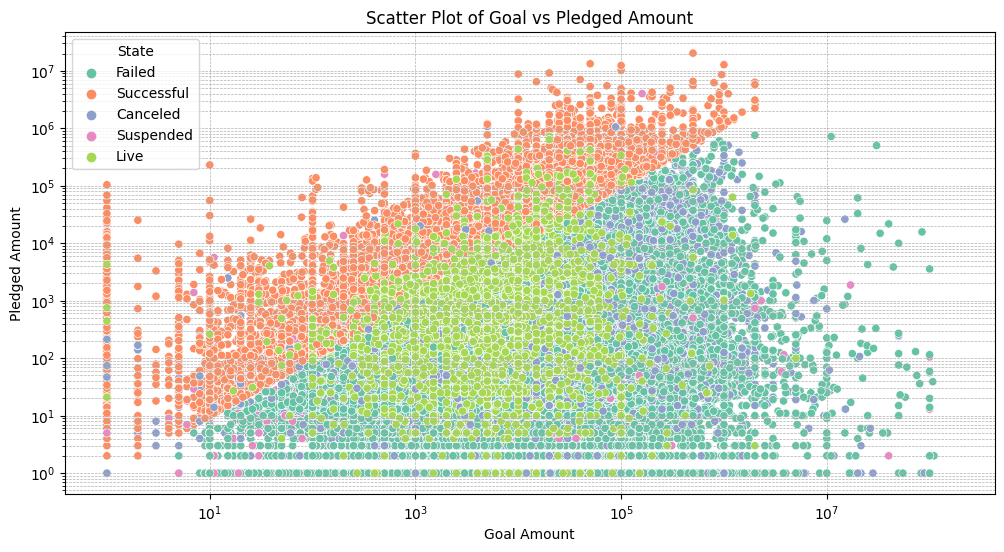

In [ ]:
# create catter plot for 'Goal' and 'Pledged' values
plt.figure(figsize=(12, 6))                     
sns.scatterplot(data=df, x='Goal', y='Pledged', hue='State', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='State')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


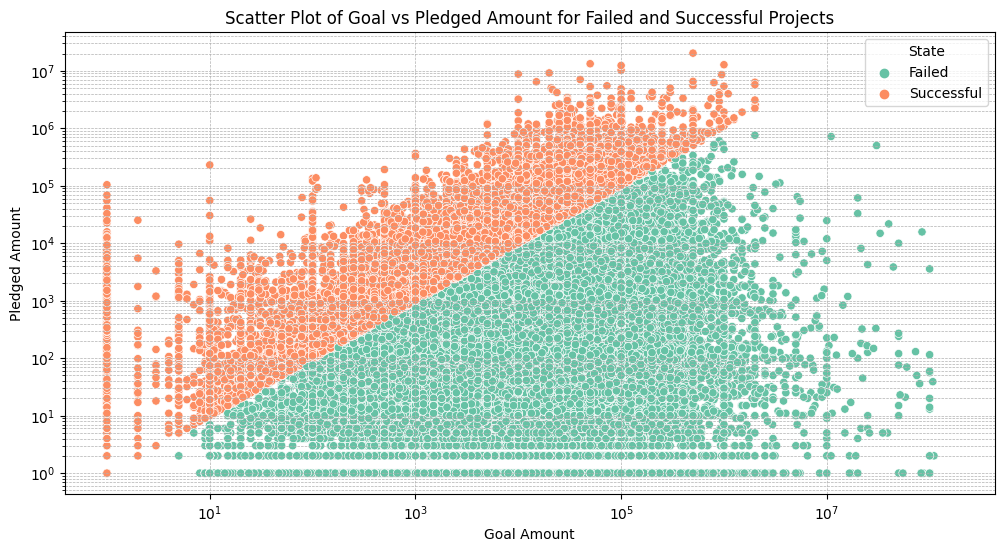

In [155]:
# create scatter plot for 'Goal' and 'Pledged' values for 'Failed' and 'Successful' states
plt.figure(figsize=(12, 6))     
sns.scatterplot(data=df[df['State'].isin(['Failed', 'Successful'])], x='Goal', y='Pledged', hue='State', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount for Failed and Successful Projects')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='State')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

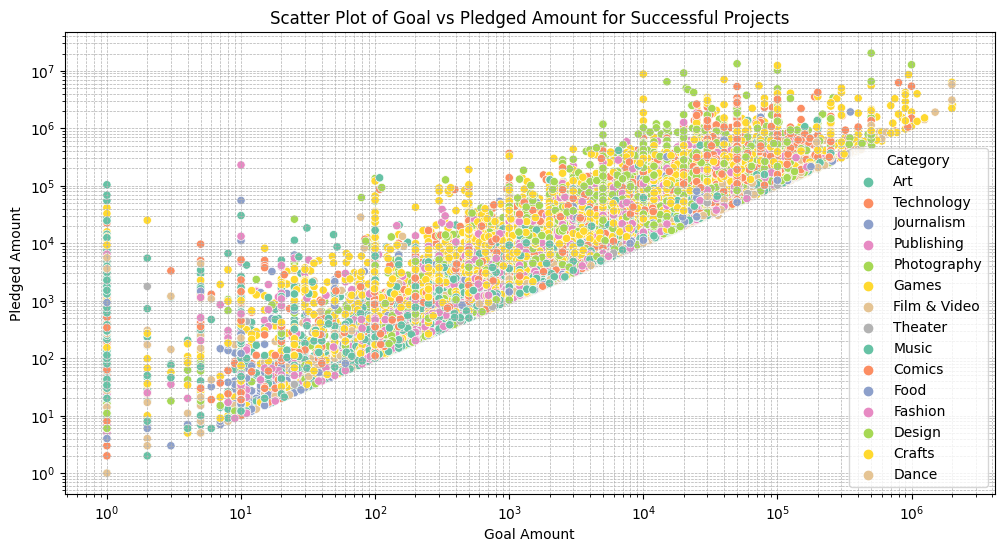

In [153]:
# create scatter plot for 'Goal' and 'Pledged' values for'Successful' states use color to seperate catogories
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['State'] == 'Successful'], x='Goal', y='Pledged', hue='Category', palette='Set2')
plt.title('Scatter Plot of Goal vs Pledged Amount for Successful Projects')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.legend(title='Category')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

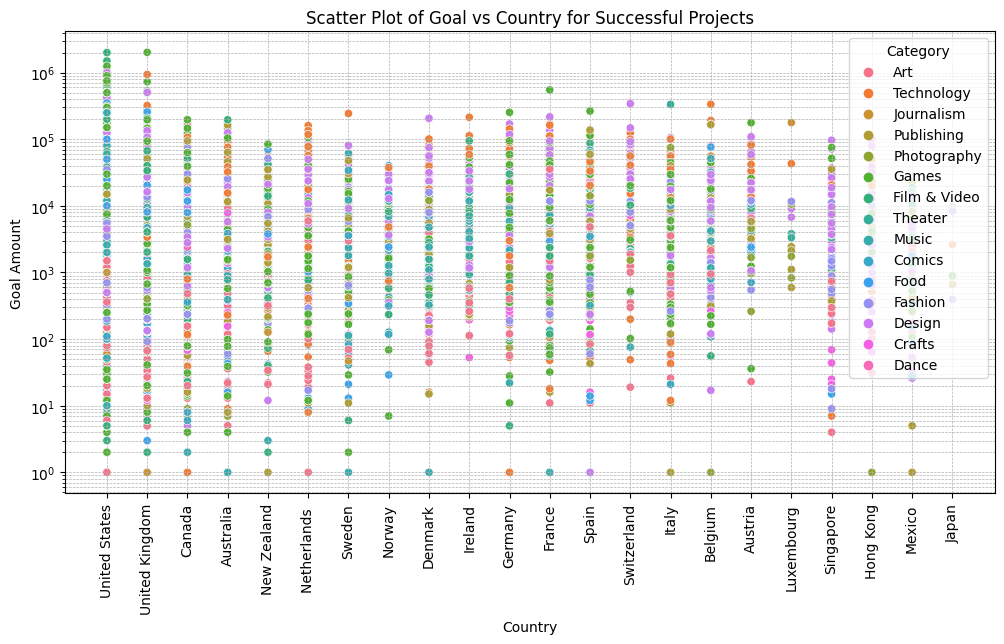

In [163]:
# create scatter plot for 'Goal' and 'Countries' values for'Successful' states use color to seperate catogories
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['State'] == 'Successful'], x='Country', y='Goal', hue='Category')
plt.title('Scatter Plot of Goal vs Country for Successful Projects')
plt.xlabel('Country')
plt.xticks(rotation=90) 
plt.ylabel('Goal Amount')
plt.legend(title='Category')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



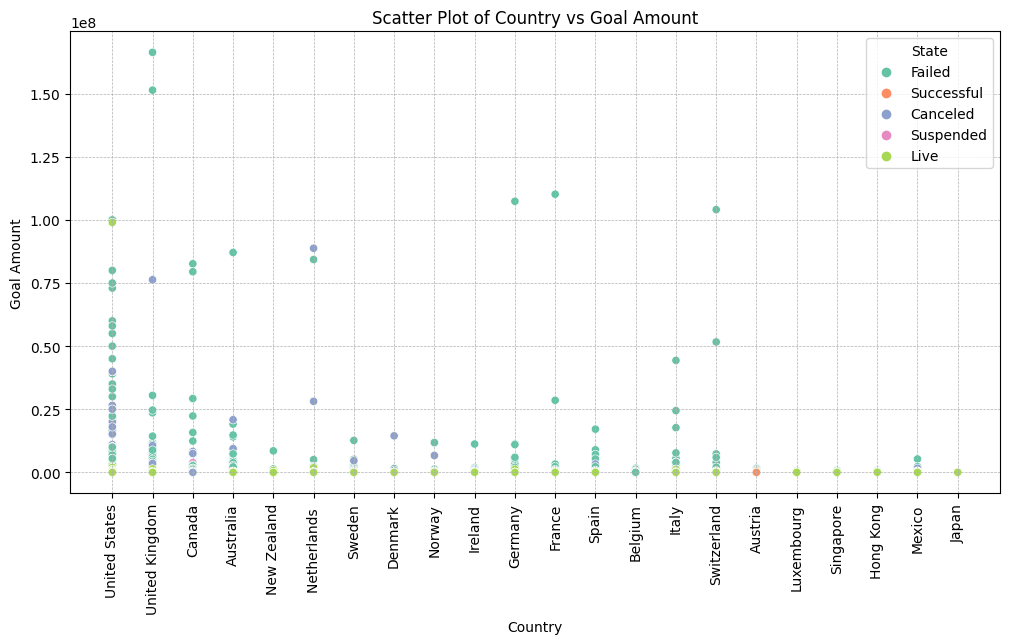

In [126]:
# Create scatter plot for 'Country' and 'Goal Amount' values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Country', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Country vs Goal Amount')
plt.xlabel('Country')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='State')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

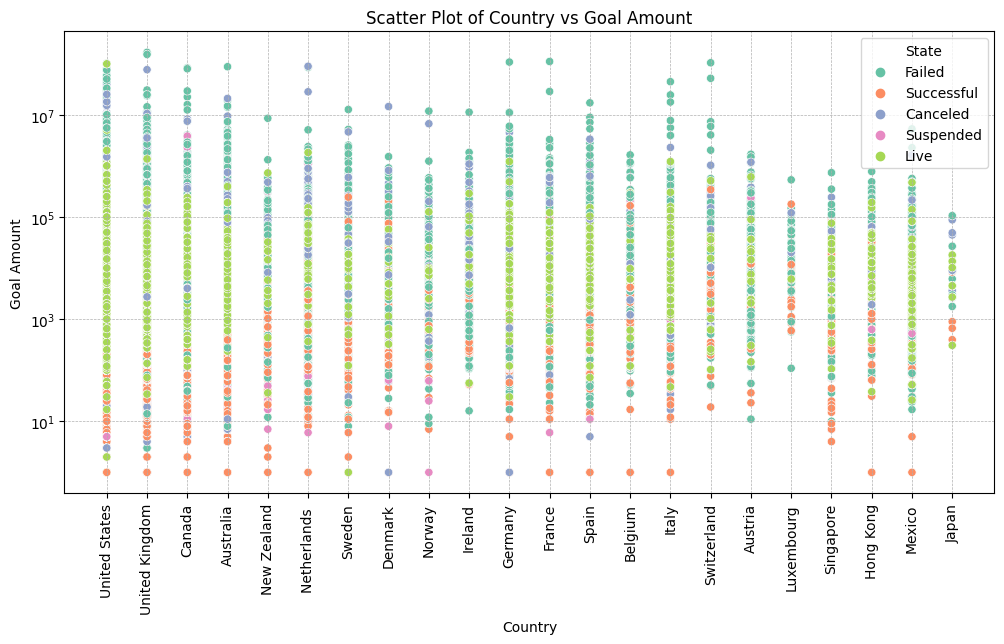

In [125]:
# create scatter plot for 'Country' and 'Goal Amount' values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Country', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Country vs Goal Amount')
plt.xlabel('Country')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


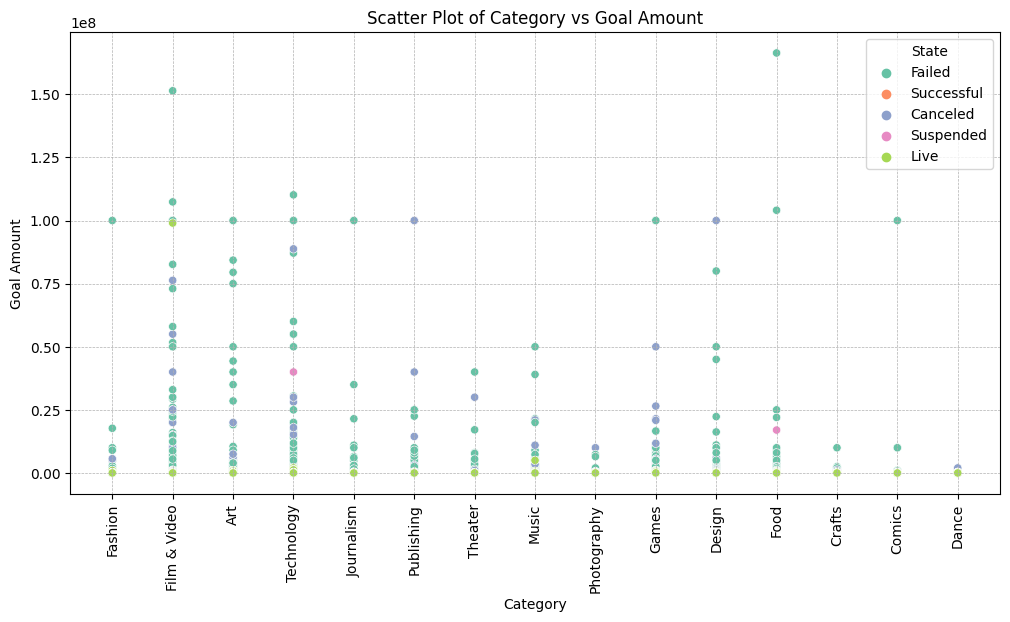

In [128]:
# create scatter plot for 'Category' and 'Goal Amount' values
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Category', y='Goal', hue='State', palette='Set2')
plt.title('Scatter Plot of Category vs Goal Amount')
plt.xlabel('Category')
plt.ylabel('Goal Amount')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [138]:
import folium

# Step 1: Filter data for 'Failed' and 'Successful' states
filtered_data = df[df['State'].isin(['Failed', 'Successful'])]

# Step 2: Group data by Country and State
grouped_data = filtered_data.groupby(['Country', 'State']).size().unstack(fill_value=0).reset_index()
grouped_data['Total'] = grouped_data['Failed'] + grouped_data['Successful']

# Step 3: Clean the 'Country' column to remove leading/trailing spaces
grouped_data['Country'] = grouped_data['Country'].str.strip()

# Step 4: Define latitude and longitude for each country
country_coords = {
    'United States': [37.0902, -95.7129],
    'United Kingdom': [55.3781, -3.4360],
    'Canada': [56.1304, -106.3468],
    'Australia': [-25.2744, 133.7751],
    'Germany': [51.1657, 10.4515],
    'France': [46.6034, 1.8883],
    'Netherlands': [52.1326, 5.2913],
    'Italy': [41.8719, 12.5674],
    'Spain': [40.4637, -3.7492],
    'Sweden': [60.1282, 18.6435],
    'Mexico': [23.6345, -102.5528],
    'New Zealand': [-40.9006, 174.8860],
    'Denmark': [56.2639, 9.5018],
    'Ireland': [53.1424, -7.6921],
    'Switzerland': [46.8182, 8.2275],
    'Norway': [60.4720, 8.4689],
    'Belgium': [50.5039, 4.4699],
    'Austria': [47.5162, 14.5501],
    'Hong Kong': [22.3193, 114.1694],
    'Singapore': [1.3521, 103.8198],
    'Luxembourg': [49.8153, 6.1296],
    'Japan': [36.2048, 138.2529]
}

# Step 5: Map latitude and longitude to the data
# Handle missing countries gracefully
grouped_data['Latitude'] = grouped_data['Country'].map(lambda x: country_coords.get(x, [None, None])[0])
grouped_data['Longitude'] = grouped_data['Country'].map(lambda x: country_coords.get(x, [None, None])[1])

# Drop rows where latitude or longitude is missing
grouped_data = grouped_data.dropna(subset=['Latitude', 'Longitude'])

# Step 6: Create the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 7: Add markers for each country and state
for _, row in grouped_data.iterrows():
    # Add marker for Successful projects (green)
    if row['Successful'] > 0:
        popup_text = (
            f"Country: {row['Country']}<br>"
            f"Successful: {row['Successful']}"
        )
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Successful'] / 10000,  # Scale the circle size
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(m)

    # Add marker for Failed projects (red)
    if row['Failed'] > 0:
        popup_text = (
            f"Country: {row['Country']}<br>"
            f"Failed: {row['Failed']}"
        )
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Failed'] / 10000,  # Scale the circle size
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(m)

# Step 8: Display the map
m

In [137]:
import folium

# Data for countries and their counts
data = pd.DataFrame({
    'Country': [
        'United States', 'United Kingdom', 'Canada', 'Australia', 'Germany', 'France',
        'Netherlands', 'Italy', 'Spain', 'Sweden', 'Mexico', 'New Zealand', 'Denmark',
        'Ireland', 'Switzerland', 'Norway', 'Belgium', 'Austria', 'Hong Kong', 'Singapore',
        'Luxembourg', 'Japan'
    ],
    'Count': [
        261358, 29453, 12370, 6616, 3436, 2520, 2411, 2369, 1873, 1509, 1411, 1274, 926,
        683, 652, 582, 523, 485, 477, 454, 57, 23
    ]
})

# Latitude and longitude for each country (simplified example)
country_coords = {
    'United States': [37.0902, -95.7129],
    'United Kingdom': [55.3781, -3.4360],
    'Canada': [56.1304, -106.3468],
    'Australia': [-25.2744, 133.7751],
    'Germany': [51.1657, 10.4515],
    'France': [46.6034, 1.8883],
    'Netherlands': [52.1326, 5.2913],
    'Italy': [41.8719, 12.5674],
    'Spain': [40.4637, -3.7492],
    'Sweden': [60.1282, 18.6435],
    'Mexico': [23.6345, -102.5528],
    'New Zealand': [-40.9006, 174.8860],
    'Denmark': [56.2639, 9.5018],
    'Ireland': [53.1424, -7.6921],
    'Switzerland': [46.8182, 8.2275],
    'Norway': [60.4720, 8.4689],
    'Belgium': [50.5039, 4.4699],
    'Austria': [47.5162, 14.5501],
    'Hong Kong': [22.3193, 114.1694],
    'Singapore': [1.3521, 103.8198],
    'Luxembourg': [49.8153, 6.1296],
    'Japan': [36.2048, 138.2529]
}
# Add latitude and longitude to the data
data['Latitude'] = data['Country'].map(lambda x: country_coords[x][0])
data['Longitude'] = data['Country'].map(lambda x: country_coords[x][1])

# Step 3: Create the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 4: Add markers for each country
for _, row in data.iterrows():
    popup_text = (
        f"Country: {row['Country']}<br>"
        f"Count: {row['Count']}"
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Count'] / 10000,  # Scale the circle size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m)
    # Display the map
m


In [45]:
# SUCCESSFUL PROJECTS BY CATEGORY
# select only the rows where the state is 'successful'
df_winners = df[df['State'] == 'Successful']
# group by 'Category' and count the number of projects
df_groupedw = df_winners.groupby('Category').size().reset_index(name='Counts')
# sort the values in descending order
df_groupedw = df_groupedw.sort_values(by='Counts', ascending=False)
df_groupedw.head()

         

,Category,Counts
10,Music,24105
6,Film & Video,23612
8,Games,12518
12,Publishing,12300
0,Art,11510


In [46]:
# LOOSERS BY CATEGORY
# select only the rows where the state is 'Failed'
df_loosers = df[df['State'] == 'Failed']
# group by 'Category' and count the number of projects
df_groupedl = df_loosers.groupby('Category').size().reset_index(name='Counts')
# sort the values in descending order
df_groupedl = df_groupedl.sort_values(by='Counts', ascending=False)
df_groupedl.head()


,Category,Counts
6,Film & Video,32891
12,Publishing,23113
10,Music,21696
13,Technology,20613
8,Games,16002


In [ ]:
#create scatter plot by category
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a scatter plot

In [49]:
# group by 'Subcategory' and count the number of projects
df_groupedsw = df_winners.groupby('Subcategory').size().reset_index(name='Counts')
# print category sub category and counts per subcategory
df_groupedsw = df_groupedsw.sort_values(by='Counts', ascending=False)
# print top 10 subcategories
df_groupedsw.head



<bound method NDFrame.head of          Subcategory  Counts
113   Product Design    7961
136   Tabletop Games    7866
129           Shorts    6673
90             Music    6340
39       Documentary    5924
..               ...     ...
150          Weaving      27
118           Quilts      19
43        Embroidery      19
83   Literary Spaces      13
137        Taxidermy       5

[159 rows x 2 columns]>

In [57]:
# sql statement
sql = """
SELECT ID, Name, Category, Subcategory, Country, Launched, Deadline, Goal, Pledged, Backers, State 
FROM kickstarter_projects 
WHERE State = 'Successful' 
OR State = 'Failed'
ORDER BY Category, Subcategory, State 
"""
# create engine
engine = create_engine('sqlite:///../data/kickstarter.db')
# create connection
connection = engine.connect()
# execute sql statement
result = connection.execute(text(sql))
# fetch all results
results = result.fetchall()
# convert to pandas dataframe
df_sql = pd.DataFrame(results, columns=result.keys())
# close connection
connection.close()
# print top 10 rows
df_sql.head(10)


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,264685346,commissioner.com,Art,Art,United States,2009-05-10 03:03:29,2009-07-02,250,2,2,Failed
1,112916020,UNINSURED LA™: Support Health Care Reform,Art,Art,United States,2009-05-26 23:40:46,2009-06-15,3000,370,8,Failed
2,345032833,Fugue State Records - Punk Rock Artist Multiples,Art,Art,United States,2009-05-30 13:35:42,2009-07-16,1000,385,8,Failed
3,1342236819,Artist Collaborative Online,Art,Art,United States,2009-07-10 04:44:51,2009-10-02,2000,0,0,Failed
4,1487884908,Artists Meeting-Art Machine (AM-AM),Art,Art,United States,2009-07-20 19:40:14,2009-10-17,4000,910,11,Failed
5,1779498251,The HuB Project,Art,Art,United States,2009-07-27 20:33:31,2009-10-25,3000,335,9,Failed
6,1952161703,Voyage to the Arctic,Art,Art,United States,2009-08-25 18:25:05,2009-10-01,3000,212,5,Failed
7,1831326209,Breathing Room,Art,Art,United States,2009-08-26 01:35:48,2009-10-24,4500,2255,33,Failed
8,519670089,The Animal Care for Artists Initiative,Art,Art,United States,2009-08-27 20:45:10,2009-10-31,5000,1735,21,Failed
9,1076649913,Hello Chicago,Art,Art,United States,2009-09-14 18:25:22,2009-12-12,14000,100,2,Failed


In [ ]:
# sql statement
sql = """
SELECT ID, Name, Category, Subcategory, Country, Launched, Deadline, Goal, Pledged, Backers, State 
FROM kickstarter_projects 
WHERE State = 'Successful' 
OR State = 'Failed'
ORDER BY Category, Subcategory, State 
"""
# create engine
engine = create_engine('sqlite:///../data/kickstarter.db')
# create connection
connection = engine.connect()
# execute sql statement
result = connection.execute(text(sql))
# fetch all results
results = result.fetchall()
# convert to pandas dataframe
df_sql = pd.DataFrame(results, columns=result.keys())
# close connection
connection.close()
# print top 10 rows
df_sql.head(10)